In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
credits = pd.read_csv("tmdb_5000_credits.csv")

In [5]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
credits.rename(columns={'movie_id':'id'},inplace=True)

In [12]:
credits.head(1)

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [13]:
# merge both
movies = movies.merge(credits,on='id')

In [14]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [15]:
movies.duplicated().sum()

0

In [18]:
movies.dropna(inplace=True)

In [19]:
movies.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64

In [20]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 4801
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1493 non-null   int64  
 1   genres                1493 non-null   object 
 2   homepage              1493 non-null   object 
 3   id                    1493 non-null   int64  
 4   keywords              1493 non-null   object 
 5   original_language     1493 non-null   object 
 6   original_title        1493 non-null   object 
 7   overview              1493 non-null   object 
 8   popularity            1493 non-null   float64
 9   production_companies  1493 non-null   object 
 10  production_countries  1493 non-null   object 
 11  release_date          1493 non-null   object 
 12  revenue               1493 non-null   int64  
 13  runtime               1493 non-null   float64
 14  spoken_languages      1493 non-null   object 
 15  status               

In [28]:
# movies.drop(['budget','genres','keywords','original_language','production_companies','production_countries','release_date',
#             'runtime','spoken_languages','status','homepage'],axis=1,inplace=True)
# movies.drop(['homepage'],axis=1,inplace=True)
movies.drop(['title_x','title_y','tagline'],axis=1,inplace=True)

In [29]:
movies.head(1)

,id,original_title,overview,popularity,revenue,vote_average,vote_count,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


# using fomula for average weighted recommendation that was used befor 2000 for recommendation.

In [31]:
# w = Rv + Cm / v + m
# 1 w  : weighted rate.
# 2 R  : Range for movie as a number from 0 to 10.
# 3 v  : numbers of votes for movies.
# 4 m  : minimum vote to be listed in the top 250.
# 5 C  : mean vote
v = movies['vote_count']
r = movies['vote_average']
c = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.70)

In [32]:
movies['weighted_average'] = ((r*v) + (c*m) / (v+m))

In [33]:
movies.head(1)

,id,original_title,overview,popularity,revenue,vote_average,vote_count,cast,crew,weighted_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",84960.653982


In [35]:
movies = movies.sort_values('weighted_average',ascending=False)

In [36]:
movies.head(1)

,id,original_title,overview,popularity,revenue,vote_average,vote_count,cast,crew,weighted_average
96,27205,Inception,"Cobb, a skilled thief who commits corporate es...",167.58371,825532764,8.1,13752,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",111391.769583


In [39]:
movies[['original_title','popularity','vote_count','vote_average','weighted_average']].head(20)

,original_title,popularity,vote_count,vote_average,weighted_average
96,Inception,167.583710,13752,8.1,111391.769583
65,The Dark Knight,187.322927,12002,8.2,98417.044105
95,Interstellar,724.247784,10867,8.1,88023.403830
16,The Avengers,144.448633,11776,7.4,87143.055175
0,Avatar,150.437577,11800,7.2,84960.653982
788,Deadpool,514.569956,10995,7.4,81363.696546
287,Django Unchained,82.121691,10099,7.8,78772.950947
662,Fight Club,146.757391,9413,8.3,78128.698706
94,Guardians of the Galaxy,481.098624,9742,7.9,76962.575066
634,The Matrix,104.309993,8907,7.9,70366.138018


# weighted_average base

In [41]:
weighted_avr = movies.sort_values('weighted_average',ascending=False)


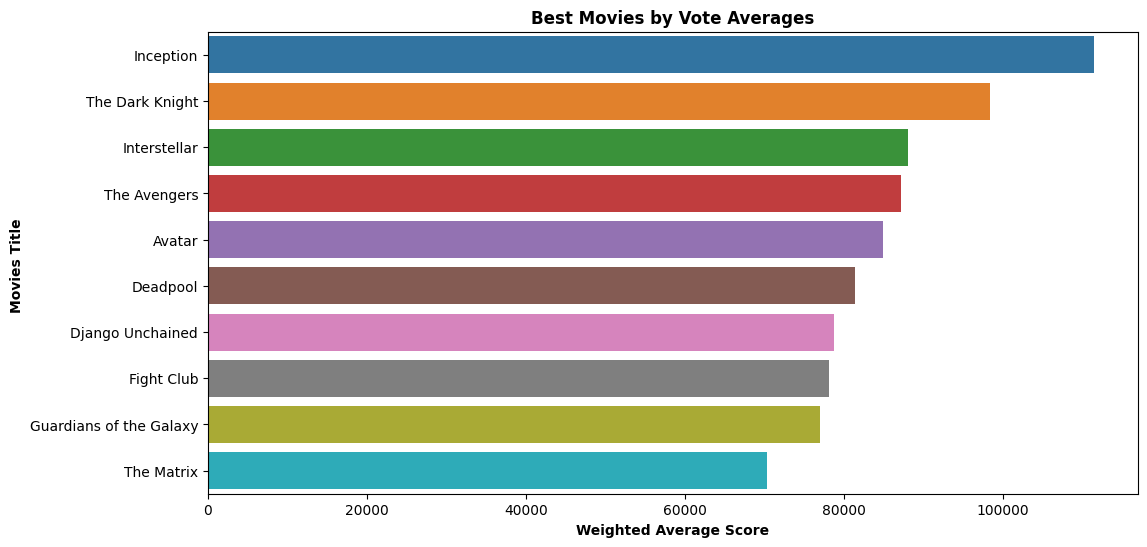

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x=weighted_avr['weighted_average'].head(10),y=weighted_avr['original_title'].head(10),data=weighted_avr)
# plt.xlim(4,10)
plt.title('Best Movies by Vote Averages',weight='bold')
plt.ylabel('Movies Title ', weight= 'bold')
plt.xlabel("Weighted Average Score", weight='bold')
plt.savefig("best_movies.png")

# popularity base

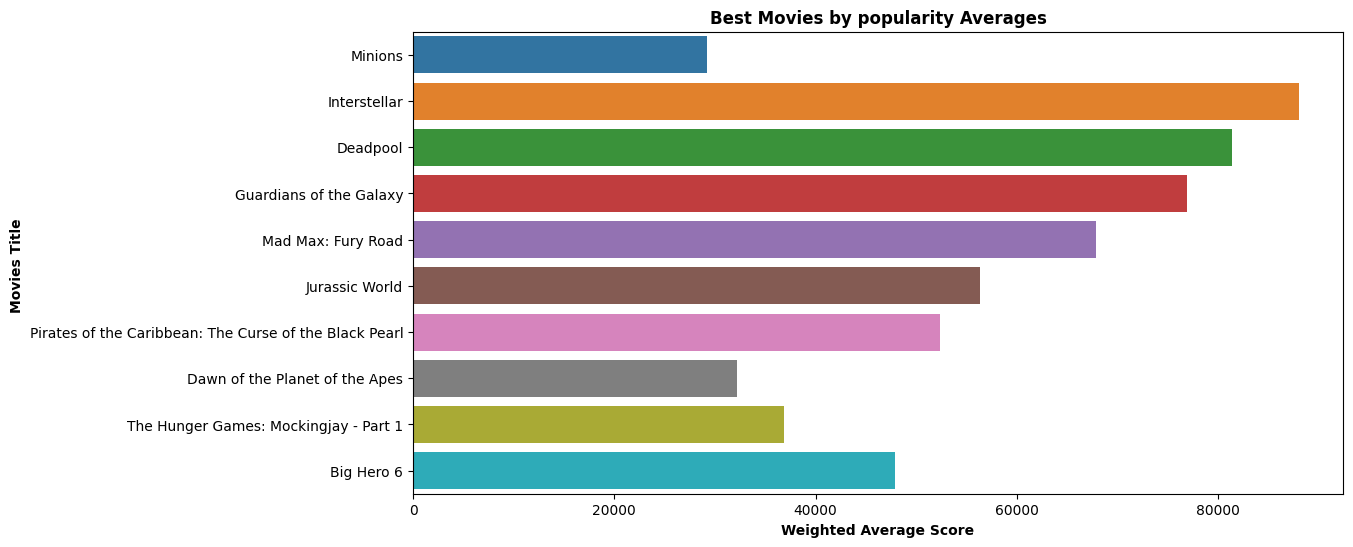

In [55]:
popularity = movies.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=popularity['weighted_average'].head(10),y=popularity['original_title'].head(10),data=popularity)
# plt.xlim(4,10)
plt.title('Best Movies by popularity Averages',weight='bold')
plt.ylabel('Movies Title ', weight= 'bold')
plt.xlabel("Weighted Average Score", weight='bold')
plt.savefig("best_movies.png")

# recommendation on scaled weighted average and popularity score (both 50%)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

In [58]:
movie_scaled = scaling.fit_transform(movies[['weighted_average','popularity']])
movie_normalized = pd.DataFrame(movie_scaled,columns=[['weighted_average','popularity']])

In [60]:
movie_normalized.head(3)

,weighted_average,popularity
0,1.000000,0.191375
1,0.883515,0.213920
2,0.790203,0.827158


In [61]:
movies[['normalized_weight_average','normalized_popularity']] = movie_normalized

In [63]:
movies.head(1)

,id,original_title,overview,popularity,revenue,vote_average,vote_count,cast,crew,weighted_average,normalized_weight_average,normalized_popularity
96,27205,Inception,"Cobb, a skilled thief who commits corporate es...",167.58371,825532764,8.1,13752,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",111391.769583,0.29126,0.071175


In [65]:
movies['score'] = movies['normalized_weight_average'] * 0.5   + movies['normalized_popularity']
movies_scored = movies.sort_values(['score'],ascending=False)
movies_scored[['original_title',"normalized_weight_average",'normalized_popularity','score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
2,Spectre,0.790203,0.827158,1.222259
121,Night at the Museum: Battle of the Smithsonian,0.262598,1.000000,1.131299
5,Spider-Man 3,0.730413,0.587678,0.952885
8,Harry Potter and the Half-Blood Prince,0.690901,0.549450,0.894900
12,Pirates of the Caribbean: Dead Man's Chest,0.609316,0.495975,0.800633
20,The Amazing Spider-Man,0.505430,0.478192,0.730907
0,Avatar,1.000000,0.191375,0.691375
1,Pirates of the Caribbean: At World's End,0.883515,0.213920,0.655678
3,The Dark Knight Rises,0.782299,0.164952,0.556102
4,John Carter,0.762706,0.171792,0.553145


In [ ]:
scored_df = movies_scored.sort_values('score',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=scored_df['weighted_average'].head(10),y=scored_df['original_title'].head(10),data=scored_df)
# plt.xlim(4,10)
plt.title('Best Movies by popularity Averages',weight='bold')
plt.ylabel('Movies Title ', weight= 'bold')
plt.xlabel("Weighted Average Score", weight='bold')
plt.savefig("best_movies.png")